<a href="https://colab.research.google.com/github/besomlu/stock_study/blob/main/3_%ED%99%98%EC%9C%A8%EC%9D%84_%EA%B3%A0%EB%A0%A4%ED%95%9C_SPY_%EB%88%84%EC%A0%81%EC%88%98%EC%9D%B5%EB%A5%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환율데이터 가져오기

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
데이터 컬럼명: Index(['원/달러(종가 15:30)'], dtype='object')


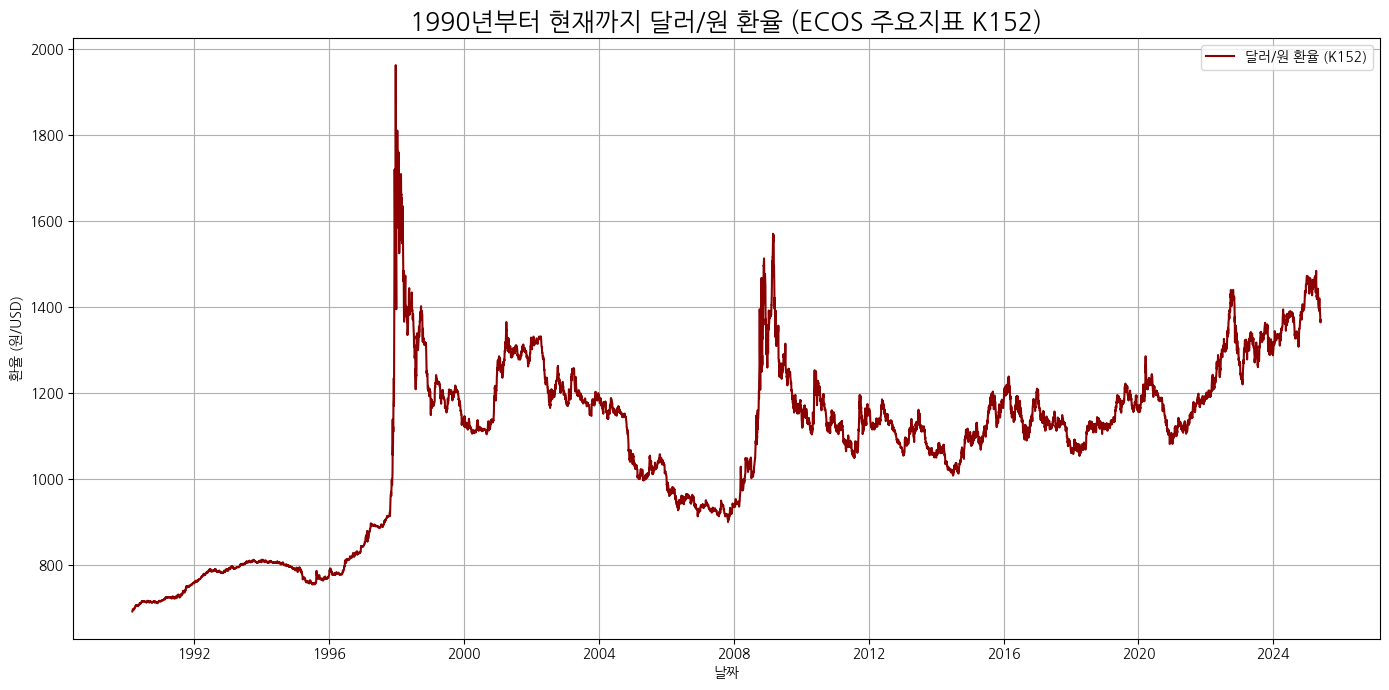

In [ ]:
# 1. 나눔고딕 폰트 설치
!apt -qq -y install fonts-nanum
!fc-cache -fv > /dev/null

# 2. FinanceDataReader 설치
!pip install -q finance-datareader

# 3. 라이브러리 불러오기 및 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import FinanceDataReader as fdr
import datetime

# 나눔고딕 폰트 등록
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 4. 데이터 조회 (1990-01-01 ~ 오늘)
start = '1990-01-01'
end = datetime.datetime.today().strftime('%Y-%m-%d')

df = fdr.DataReader('ECOS-KEYSTAT:K152', start, end)

# 5. 컬럼명 확인 및 그래프 그리기
print("데이터 컬럼명:", df.columns)

# 컬럼이 1개일 경우 해당 컬럼명 사용
if len(df.columns) == 1:
    col = df.columns[0]
else:
    col = 'value'  # 기본값 fallback

plt.figure(figsize=(14,7))
plt.plot(df.index, df[col], label='달러/원 환율 (K152)', color='darkred')
plt.title('1990년부터 현재까지 달러/원 환율 (ECOS 주요지표 K152)', fontsize=18)
plt.xlabel('날짜')
plt.ylabel('환율 (원/USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Google Colab에서 실행 가능한 파이썬 코드를 만들어줘. 아래 조건을 모두 만족해야 해:

1. 나눔고딕 폰트를 설치하고 폰트매니저에 설치된 폰트를 모두 등록할 것. matplotlib에서 한글이 잘 보이도록 설정할 것.
2. FinanceDataReader를 사용하고 한국은행 ECOS 주요지표 코드 ECOS-KEYSTAT:K152를 사용하여 환율 정보를 가져올 것.
3. 기간은 1990년부터 현재까지로 할 것.
3. 이를 그래프로 그릴 것. 컬럼이 1개 이므로 적절하게 컨럼명을 찾아서 오류가 없도록 해줘

# 환율 데이터를 이용한 달러 자산 가격의 원화 환산

*   항목 추가

*   항목 추가
*   항목 추가


*   항목 추가



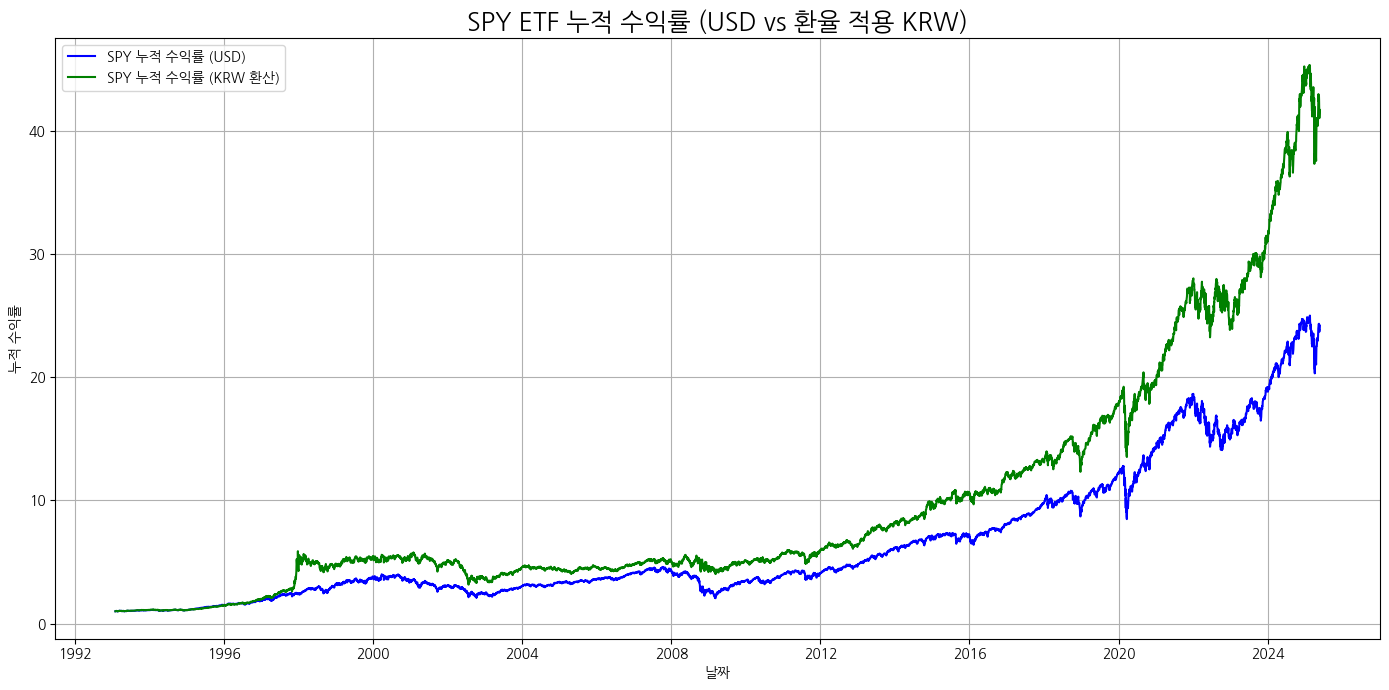

In [ ]:
# 1. 나눔고딕 폰트 설치
!apt -qq -y install fonts-nanum > /dev/null
!fc-cache -fv > /dev/null

# 2. 라이브러리 설치
!pip install -q finance-datareader

# 3. 라이브러리 불러오기 및 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import FinanceDataReader as fdr
import pandas as pd
import datetime

# 폰트 설정
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 4. 날짜 설정
start = '1990-01-01'
end = datetime.datetime.today().strftime('%Y-%m-%d')

# 5. 환율 데이터 (ECOS 주요지표 코드: K152)
krw_df = fdr.DataReader('ECOS-KEYSTAT:K152', start, end)
krw_col = krw_df.columns[0] if len(krw_df.columns) == 1 else 'value'
krw_df.rename(columns={krw_col: 'USD_KRW'}, inplace=True)

# 6. SPY ETF 데이터 (FinanceDataReader 사용, Adj Close 컬럼 사용)
spy_df = fdr.DataReader('SPY', start, end)
spy_df = spy_df[['Adj Close']].rename(columns={'Adj Close': 'SPY_USD'})

# 7. 데이터 병합
df = pd.merge(spy_df, krw_df, left_index=True, right_index=True, how='inner')
df.dropna(inplace=True)

# 8. 누적 수익률 계산
df['SPY_USD_Return'] = df['SPY_USD'] / df['SPY_USD'].iloc[0]
df['SPY_KRW'] = df['SPY_USD'] * df['USD_KRW']
df['SPY_KRW_Return'] = df['SPY_KRW'] / df['SPY_KRW'].iloc[0]

# 9. 그래프 시각화
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['SPY_USD_Return'], label='SPY 누적 수익률 (USD)', color='blue')
plt.plot(df.index, df['SPY_KRW_Return'], label='SPY 누적 수익률 (KRW 환산)', color='green')
plt.title('SPY ETF 누적 수익률 (USD vs 환율 적용 KRW)', fontsize=18)
plt.xlabel('날짜')
plt.ylabel('누적 수익률')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Google Colab에서 실행 가능한 파이썬 코드를 만들어줘. 아래 조건을 모두 만족해야 해:

1. 환경설정 : 나눔고딕 폰트를 설치하고 폰트매니저에 설치된 폰트를 모두 등록할 것. matplotlib에서 한글이 잘 보이도록 설정할 것.
2. 환율 정보 수집 : FinanceDataReader를 사용하고 한국은행 ECOS 주요지표 코드 ECOS-KEYSTAT:K152를 사용하여 환율 정보를 가져올 것. 컬럼이 1개 이므로 적절하게 컬럼명을 찾아서 오류가 없도록 해줘
3. 투자 정보 산출 : FinanceDataReader 사용할 것.
- 종목 : SPY ETF
- 기간 : 1990년 부터 현재
- 종가 : Adj Close 사용
4. SPY ETF의 USD 누적 수익률, 환율을 적용한 KRW의 누적수익률 각각을 그래프로 그릴 것.